# Students’ Adaptability Level Prediction in an Online Class

This notebook looks into using various Python-based machine learning and
data science libraries in an attempt to build a machine learning model
capable of predicting whether or not a student is capable of adapting to
an online class  based on the data provided.

The following approach will be used:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

#### 1. Problem

>In a statement, Given the data provided about a student, can we predict whether or not they can adapt to online schooling?

#### 2. Data

>The dataset is provided by the MO-IT100 - Introduction to Computing from the MMDC MyCamu's Repository. Source: https://docs.google.com/spreadsheets/d/1b0KBuWPZjwJNibOcyg5NoS4mkxUay0wBDeZAm-LHPsg/edit#gid=1140775492

>The original dataset came from Students' Adaptability Level Prediction in Online Education using Machine Learning Approaches or DOI: 10.1109/ICCCNT51525.2021.9579741.

#### 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a student is able to adapt to online schooling during the proof of concept, we'll pursue the project.


#### 4. Features

>Features are different parts of the data. Provided below is a **data dictionary** will help through the process.

### Student Adaptability Level Data Dictionary

The following are the features will be used to predict our target variable (heart disease or no heart disease).

1. `Gender` - (Boy = 1; Girl = 0) 
2. `Age` - Age in years 
    * 1-5 = 0
    * 6-10 = 1
    * 11-15 = 2
    * 16-20 = 3
    * 26-30 = 4
2. `Education Level` - Current level of the student
    * School = 0
    * College = 1
    * University = 2
3. `Institution Type` - (Non Government = 0; Government = 1)
4. `IT Student` - (No = 0; Yes = 1)
5. `Location` - Not sure what this means (No = 0; Yes = 1) 
6. `Load-shedding` - (Low = 0; High = 1)
7. `Financial Condition` - the financial status of a student(No Range Provided)
    * Poor = 0
    * Mid = 1
    * Rich = 2
8. `Internet Type` - Connectivity to the network used by the student
    * Mobile Data = 0
    * Wifi = 1
9. `Network Type` - Type of generation network
    * 3G - Third Generation Network = 0
    * 4G - Fourth Generation Network = 1
10. `Class Duration` - the duration of the student class 
    * 0 = 0
    * 1-3 = 1
11. `Self Lms` - (No = 0; Yes = 1)
12. `Device` - Type of device used by a student
    * Tab = 0
    * Mobile = 1
    * Computer = 2
13. `Adaptivity Level` - Adaptability level of a student to online class
    * Low = 0
    * Moderate = 1
    * High = 2

_**Note:** No personal identifiable information (PPI) can be found in the dataset._

## Preparing the tools

Data Analysis and Manipulation: Pandas, Matplotlib & NumPy

Modelling: Scikit-Learn

* [Pandas](https://pandas.pydata.org/) for data analysis.
* [NumPy](https://numpy.org/) for numerical operations.
* [Matplotlib](https://matplotlib.org/)/[Seaborn](https://seaborn.pydata.org/) for plotting or data visualization.
* [Scikit-Learn](https://scikit-learn.org/stable/) for machine learning modelling and evaluation.

In [7]:
# Import libraries for regular EDA (Exploratory Data Analysis)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Ealuations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from scikitplot.metrics import plot_roc_curve

## Load Data

In [19]:
# Read Worksheet Worksheet #4: Mini Task on Data Analytics from the data folder
df = pd.read_csv("./data/Worksheet #4_ Mini Task on Data Analytics - Dataset.csv")

# Check shape of rows and column of the dataframe shape(rows, cols)
print(f"Table Rows: {df.shape[0]} | Columns: {df.shape[1]}")

Table Rows: 1205 | Columns: 14


## Data Exploration (EDA - Exploratory Data Analysis)

In [20]:
# Overview of dataframe
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [21]:
# Over view of how many class available in our target column
df['Adaptivity Level'].value_counts()

Moderate    625
Low         480
High        100
Name: Adaptivity Level, dtype: int64

The balance of adaptivity level can be measured by looking at the distribution of adaptivity levels across a population or sample. In this case, there are three levels: moderate, low, and high, and the number of individuals in each level is provided.

The highest number of individuals are in the moderate adaptivity level group, with 625 individuals. This suggests that the majority of individuals have a moderate level of adaptivity, meaning they are able to adjust to new situations and environments, but may struggle with major changes or unexpected events.

The low adaptivity level group contains 480 individuals, which is a substantial portion of the population. These individuals may struggle more with adapting to new situations and may benefit from additional support or resources to help them adjust.

Finally, there are only 100 individuals in the high adaptivity level group, suggesting that this is a relatively rare trait within the population. These individuals may be particularly skilled at adapting to new situations and thrive in challenging or uncertain environments.

Overall, the balance of adaptivity level within this population suggests that while most individuals have a moderate level of adaptivity, there is a significant minority who may benefit from additional support, and a smaller group who possess exceptional adaptability.

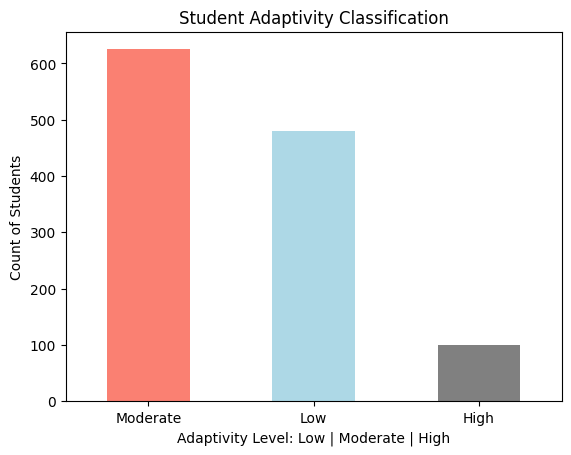

In [22]:
# Plot Adaptivity column
df['Adaptivity Level'].value_counts().plot(kind='bar', color=['salmon', 'lightblue', 'grey'])
plt.title("Student Adaptivity Classification")
plt.xlabel("Adaptivity Level: Low | Moderate | High")
plt.ylabel("Count of Students")
plt.xticks(rotation = 0);

In [24]:
# TODO 
# Info check